In [2]:
import pandas as pd

In [3]:
# SETUP
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import rc_context
from matplotlib.gridspec import GridSpec
from matplotlib.figure import Figure
import matplotlib.patches as mpatches
from matplotlib.container import BarContainer
from typing import Literal
import seaborn as sns
import math
import warnings
from matplotlib.patches import FancyBboxPatch
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler
import matplotlib.gridspec as gridspec

warnings.simplefilter(action='ignore', category=FutureWarning)

pixel = int
axsize = float

color_pallete = {
    'red':'#EF476F',
    'yellow':'#FFD166',
    'green':'#06D6A0',
    'blue':'#118AB2',
    'dark_blue':'#073B4C',
    'green':'#449c1c',
    'orange':'#ed6611'
}

class MPLContext:
    color_pallete = {
            'red':'#EF476F',
            'yellow':'#FFD166',
            'green':'#06D6A0',
            'blue':'#118AB2',
            'dark_blue':'#073B4C',
            'green':'#449c1c',
            'orange':'#ed6611'
    }
    context = {
        'axes.facecolor':'fffbe8',
        'axes.grid':True,
        'axes.labelsize' : 6,
        'xtick.major.size':1.0,
        'xtick.minor.size':0.5,
        'xtick.major.width':0.7,
        'xtick.minor.width':0.5,
        'xtick.labelsize':6,
        'ytick.major.size':1.0,
        'ytick.minor.size':0.5,
        'ytick.major.width':0.7,
        'ytick.minor.width':0.5,
        'ytick.labelsize':6,
        
        'grid.color':"#b0b0b0",
        'grid.linewidth': 0.5,
        'grid.alpha':0.2,

        'legend.frameon':True,
        'legend.facecolor':'fffbe8',
        'legend.edgecolor':'0A0A0A',
        'legend.fontsize':4,
        'legend.title_fontsize':5,
        'figure.facecolor':'fffbe8',
        
        'lines.linewidth':0.5,
        'lines.markersize':3,

        'axes.prop_cycle': "cycler('color', ['118AB2', 'EF476F', 'FFD166', '06D6A0', '073B4C', '1f77b4', 'ff7f0e', '2ca02c', 'd62728', '9467bd'])"
    }
    
def fontsize_to_pixel_size(fontsize:float| int, dpi: float| int) -> float:
    """
    Converts fontsize into pixel size, according to the dpi
    """
    return (fontsize / 72) * dpi

def pixel_size_to_axes_size(ax: plt.Axes):
    """
    Converts pixel size into the axes size (height)
    """
    return 1 / ax.get_window_extent().height

def get_spacing_in_transaxes(spacing: pixel, ax:plt.Axes) -> axsize:
    """
    tile_spacing in pixels
    """
    return pixel_size_to_axes_size(ax) * spacing

def set_title_subtitle(ax: plt.Axes, title: str, subtitle:str = None, dpi:float| int = 150, title_spacing: pixel = 10, subtitle_spacing:pixel=7,  title_fontsize: int = 8, subtitle_fontisze: int = 6, title_fontweight='bold'):
    """
    Add and format title and subtitle to ax
    
    Args:
        ax (plt.Axes): Axes to add title to
        title (str): Title content
        subtitle (str, optional): Subtitle content. Defaults to None.
        dpi (float | int, optional): figure dpi. Defaults to 150.
        title_spacing (pixel, optional): Title spacing from axes to text. Defaults to 10.
        subtitle_spacing (pixel, optional): Subtitle spacing from title to text. Defaults to 7.
        title_fontsize (int, optional): Title fontsize. Defaults to 8.
        subtitle_fontisze (int, optional): Subtitle fontsize. Defaults to 6.
    """
    title_spacing_ax: axsize = get_spacing_in_transaxes(spacing=title_spacing,ax = ax)
    subtitle_spacing_ax: axsize = get_spacing_in_transaxes(spacing=subtitle_spacing, ax=ax)
    title_height: axsize = get_spacing_in_transaxes(fontsize_to_pixel_size(subtitle_fontisze, dpi=dpi), ax=ax)
     
    if subtitle:
        ax.text(
            0, 
            1 + title_spacing_ax + title_height + subtitle_spacing_ax,
            title,
            transform=ax.transAxes,
            fontsize = title_fontsize,
            fontweight=title_fontweight
            )
        ax.text(
            0,
            1 + title_spacing_ax,
            subtitle,
            transform=ax.transAxes,
            fontsize=subtitle_fontisze
            )
    else:
        ax.text(
            0,
            1+title_spacing_ax,
            title,
            transform=ax.transAxes, 
            fontsize = title_fontsize, 
            fontweight=title_fontweight
        )
    return

def set_xlabel_ylabel(ax: plt.Axes, xlabel:str = None, ylabel:str = None, label_fontsize:int = 6):
    """

    Args:
        ax (plt.Axes): _description_
        xlabel (str, optional): _description_. Defaults to None.
        ylabel (str, optional): _description_. Defaults to None.
        label_fontsize (int, optional): _description_. Defaults to 6.

    Returns:
        _type_: _description_
    """
    if xlabel:
        ax.set_xlabel(xlabel)
        ax.xaxis.label.set_fontsize(label_fontsize)
    if ylabel:
        ax.set_ylabel(ylabel)
        ax.yaxis.label.set_fontsize(label_fontsize)
    return ax

def set_spines_off(ax: plt.Axes | list[plt.Axes], spines: list[str] = ["right", "top"]) -> plt.Axes:
    if type(ax) == list:
        for a in ax:
            for s in spines:
                a.spines[s].set_visible(False)
    else:
        for s in spines:
            ax.spines[s].set_visible(False)
    return ax

def set_text_to_hbars(ax: plt.Axes, spacing: float= 0.01)-> plt.Axes:
    x_min, x_max = ax.get_xlim()  # Get x-axis limits

    xsize = x_max - x_min
    
    for idx, p in enumerate(ax.patches):
        value = f'{p.get_width():.2f}'
        x = p.get_x() + p.get_width() + spacing * xsize
        y = p.get_y() + p.get_height() / 2 
        ax.text(x, y, value, ha='left', va='center', fontsize=6)
    return ax

def set_text_to_vbars(ax: plt.Axes, spacing: float= 0.01)-> plt.Axes:
    y_min, y_max = ax.get_ylim()  # Get x-axis limits

    ysize = y_max - y_min
    
    for idx, p in enumerate(ax.patches):
        value = f'{p.get_height():.2f}'
        x = p.get_x() + p.get_width() / 2
        y = p.get_y() + p.get_height() + spacing * ysize 
        ax.text(x, y, value, ha='center', va='bottom', fontsize=4) 

def get_list_of_axes(n_rows: int, n_cols: int):
    return [[None for i in range(n_cols)] for j in range(n_rows)]

def get_list_of_axes_subfigures(fig,gs,n_rows:int, n_cols:int):
    axs = get_list_of_axes(n_rows, n_cols)
    for i in range(n_rows):
        for j in range(n_cols):
            axs[i][j] = fig.add_subplot(gs[i,j])
    return axs
    
def get_fig_gs(nrows:int=1, ncols:int=1, dpi: int = 150, figsize: tuple[int, int]=(7,4),hspace: float = None, wspace:float= None) -> tuple[Figure, GridSpec]:
    """

    Args:
        nrows (int, optional): _description_. Defaults to 1.
        ncols (int, optional): _description_. Defaults to 1.
        dpi (int, optional): _description_. Defaults to 150.

    Returns:
        tuple[Figure, GridSpec]: _description_
    """
    fig = plt.figure(figsize=figsize, dpi=200)
    gs = fig.add_gridspec(nrows, ncols,hspace=hspace,wspace=wspace)
    return fig, gs

def set_legend(ax: plt.Axes):
    """_summary_

    Args:
        ax (plt.Axes): _description_

    Returns:
        _type_: _description_
    """
    legend = ax.legend()
    legend.get_frame().set_linewidth(0.5)  # Set border linewidth
    legend.get_frame().set_boxstyle("Square")  # Disable rounded corners
    return legend

def _add_text_to_center_of_bar(ax:plt.Axes, text:str, p: BarContainer):
    for _, p in enumerate(p.patches):
        x = p.get_x() + p.get_width() / 2
        y = p.get_y() + p.get_height() / 2
        ax.text(x, y, text, ha='center', va='center', fontsize=6, color='white')
    return ax

def _create_nan_legend(ax:plt.Axes,CONTEXT: dict):
    with rc_context(CONTEXT):
        legend= ax.legend(handles=[mpatches.Patch(color='grey', label='NaN')],
              loc="upper right",  # Place legend at the bottom center
            bbox_to_anchor=(1, 1.02),  # Move legend slightly below the plot
            frameon=True)
        legend.get_frame().set_linewidth(0.5)  # Set border linewidth
        legend.get_frame().set_boxstyle("Square")  # Disable rounded corners
    return legend

def plot_nan_dtype_dataframe(df: pd.DataFrame, CONTEXT:dict):
    TOTAL_ROWS: int = df.shape[0]
    
    dftypes: pd.DataFrame = df.dtypes.copy()
    
    yticklabels = []
    yticks = np.arange(0.5,dftypes.shape[0] + 0.5)
    
    bottom = 0
    counter = 0
    
    # Prep
    with rc_context(CONTEXT):
        fig, gs = get_fig_gs(1,6)
        ax = fig.add_subplot(gs[0,0])
        ax2 = fig.add_subplot(gs[0,1:])
    
    ## Plotting the data
    for df_dtype in dftypes.value_counts().index:
        text = str(df_dtype)
        height = dftypes[dftypes == df_dtype].shape[0]
        yticklabels.extend(list(dftypes[dftypes == df_dtype].index))
        
        p = ax.bar("Data types", height, 0.5, label=text, bottom=bottom, linewidth=0.5, linestyle='dashed', edgecolor='black')
        _add_text_to_center_of_bar(ax, text, p)

            
        color = p.patches[0].get_facecolor()
        bottom += height
        
        for col in dftypes[dftypes == df_dtype].index:
            nan_shape = df[col].isna().sum() * 100/TOTAL_ROWS
            n_missing_rows = df[col].isna().sum()
            ax2.barh(yticks[counter],100, color=color, height=1,linewidth=0.5, linestyle='dashed', edgecolor='black')
            ax2.barh(yticks[counter],nan_shape, height=1,color='grey',linewidth=0.5, linestyle='dashed', edgecolor='black')
            if nan_shape > 0:
                txt = ax2.text(102, yticks[counter], f"{n_missing_rows:02}", color='grey', fontsize=5, ha='left', va='center', bbox=dict(boxstyle='circle', fc="#fffbe8", ec="k",lw=0.5))
            counter += 1

    _create_nan_legend(ax2, CONTEXT=CONTEXT)
    
    
    ## FIGURE CONFIGS
    set_title_subtitle(ax, title="Data types and NaN Columns", dpi=150, title_spacing=0)
    set_xlabel_ylabel(ax2,xlabel='Not NaN Cols percentage')

    ax2.set_ylim(ax.get_ylim())
    
    ax.tick_params(axis='both', which='both', length=0)
    ax2.tick_params(axis='y', which='both', length=0)
    
    ax.set_yticks(yticks)
    ax2.set_yticks(yticks)
    
    ax.set_yticklabels(yticklabels)
    ax2.set_yticklabels([])

    set_spines_off([ax,ax2],["right","top","left","bottom"])
    
    ax2.grid(False)
    ax.grid(False)
    plt.show()
    return

def plot_cat_col(ax: plt.Axes, x: pd.Series, title: str, max_amount_cats: int = 20):
    data = x.value_counts().sort_values(ascending=False)
    if len(data.index) >= max_amount_cats:
        ax.barh(data.index, data.values, height=1, color='#EF476F')
        ax.set_yticklabels([])
    else:
        ax.barh(data.index, data.values, color='#EF476F', linewidth=0.5, edgecolor='black')
        set_text_to_hbars(ax)
    set_spines_off(ax)
    set_title_subtitle(ax, title=f"{title}", title_spacing=15)
    return

def plot_num_col(ax: plt.Axes, x:pd.Series, title:str):
    sns.histplot(x=x, ax=ax,  color='#118AB2',alpha=1,fill=True)

    set_spines_off(ax)
    set_title_subtitle(ax, title=f"{title}", title_spacing=15)
    return

def plot_all_cols(df:pd.DataFrame, context:dict = {}, dpi:int=200):
    _find_smallest_x = lambda N:  math.ceil(math.sqrt(N)) 
    dtypes_series = df.dtypes.sort_values()

            
    N = _find_smallest_x(len(df.columns))
    n_features = len(df.columns)

    with rc_context(context):
        axs=[[None for i in range(N)] for j in range(N)] 
        fig, gs = get_fig_gs(N, N, figsize = (7+3*N, 3*N),dpi=dpi)
    
        for idx, col in enumerate(df.columns):
            
            axs[idx // N][idx % N] = fig.add_subplot(gs[idx // N, idx % N])
            if dtypes_series[col] in ['int64', 'float64']:
                plot_num_col(axs[idx // N][idx % N], df[col], col.capitalize())
            elif dtypes_series[col] in ['object','bool']:
                plot_cat_col(axs[idx // N][idx % N], df[col], col.capitalize())

    set_title_subtitle(axs[0][0], title=f"Features",title_fontsize=16, title_spacing=45,dpi=dpi)
    plt.tight_layout()
    return

def scatter_plot_with_cat(ax: plt.Axes, df: pd.DataFrame, x: str, y:str, target: str):
    unique_cats = df[target].unique()

    for c in unique_cats:
        ax.scatter(df[df[target] == c][x], df[df[target] == c][y], label=c)

    set_legend(ax)
    set_title_subtitle(ax, f"{x} x {y}")
    set_xlabel_ylabel(ax, xlabel=x, ylabel=y)
    
def plot_nan_train_test(train_df: pd.DataFrame, test_df:pd.DataFrame, columns: list[str],CONTEXT:dict):
    TOTAL_ROWS: int = train_df[columns].shape[0]
    
    dftypes: pd.DataFrame = train_df[columns].dtypes.copy()
    
    yticklabels = []
    yticks = np.arange(0.5,dftypes.shape[0] + 0.5)
    
    bottom = 0
    counter = 0
    
    # Prep
    with rc_context(CONTEXT):
        fig, gs = get_fig_gs(1,11)
        ax = fig.add_subplot(gs[0,0])
        ax2 = fig.add_subplot(gs[0,1:6])
        ax3 = fig.add_subplot(gs[0,6:])
        
    ## Plotting the data
    for df_dtype in dftypes.value_counts().index:
        text = str(df_dtype)
        height = dftypes[dftypes == df_dtype].shape[0]
        yticklabels.extend(list(dftypes[dftypes == df_dtype].index))
        
        p = ax.bar("DTYPES", height, 0.5, label=text, bottom=bottom, linewidth=0.5, linestyle='dashed', edgecolor='black')
        _add_text_to_center_of_bar(ax, text, p)

        color = p.patches[0].get_facecolor()
        bottom += height
        
        for col in dftypes[dftypes == df_dtype].index:
            nan_shape_train = train_df[col].isna().sum() * 100/TOTAL_ROWS
            n_missing_rows_train = train_df[col].isna().sum()
            ax2.barh(yticks[counter],100, color=color, height=1,linewidth=0.5, linestyle='dashed', edgecolor='black')
            ax2.barh(yticks[counter],nan_shape_train, height=1,color='grey',linewidth=0.5, linestyle='dashed', edgecolor='black')
            
            nan_shape_test = test_df[col].isna().sum() * 100/TOTAL_ROWS
            n_missing_rows_test = test_df[col].isna().sum()
            ax3.barh(yticks[counter],100, color=color, height=1,linewidth=0.5, linestyle='dashed', edgecolor='black')
            ax3.barh(yticks[counter],nan_shape_test, height=1,color='grey',linewidth=0.5, linestyle='dashed', edgecolor='black')
            
            if nan_shape_train > 0:
                txt = ax2.text(nan_shape_train + 2, yticks[counter], f"{n_missing_rows_train:02}", color='#dedede', fontsize=6, ha='left', va='center')
            if nan_shape_test > 0:
                txt = ax3.text(nan_shape_test + 2, yticks[counter], f"{n_missing_rows_test:02}", color='#dedede', fontsize=6, ha='left', va='center')
            counter += 1

    _create_nan_legend(ax3, CONTEXT=CONTEXT)
    
    ## FIGURE CONFIGS
    set_title_subtitle(ax, title="Data types and NaN Columns", dpi=150, title_spacing=0)
    set_xlabel_ylabel(ax2,xlabel='TRAIN NAN')
    set_xlabel_ylabel(ax3,xlabel='TEST NAN')

    ax2.set_ylim(ax.get_ylim())
    ax3.set_ylim(ax.get_ylim())
    
    ax.tick_params(axis='both', which='both', length=0)
    ax2.tick_params(axis='y', which='both', length=0)
    ax3.tick_params(axis='y', which='both', length=0)

    ax.set_yticks(yticks)
    ax2.set_yticks(yticks)
    ax3.set_yticks(yticks)

    ax2.set_xticks([])
    ax3.set_xticks([])
    
    ax.set_yticklabels(yticklabels)
    ax2.set_yticklabels([])
    ax3.set_yticklabels([])

    set_spines_off([ax,ax2,ax3],["right","top","left","bottom"])
    
    ax.grid(False)    
    ax2.grid(False)
    ax3.grid(False)

    plt.show()
    return

def _train_test_kdeplot_col(ax:plt.Axes, train_df:pd.DataFrame, test_df:pd.DataFrame, col:str):
    sns.kdeplot(train_df[col],ax=ax,label="train",common_norm=True, color=color_pallete['orange'], linewidth=1.5, alpha=0.8)
    sns.kdeplot(test_df[col],ax=ax,label="test",common_norm=True,color=color_pallete['green'], linewidth=1.5, alpha=0.8)
    return
    
def _train_test_boxplot_col(ax:plt.Axes, train_df:pd.DataFrame, test_df:pd.DataFrame, col:str):
    _temp_test = test_df[[col]].copy().reset_index(drop=True)
    _temp_train = train_df[[col]].copy().reset_index(drop=True)

    _temp_train['type'] = 'Train'
    _temp_test['type'] = 'Test'
    
    _temp = pd.concat([_temp_train, _temp_test], ignore_index=True)

    sns.boxplot(_temp, x=col, y='type', ax=ax, palette=[color_pallete['orange'],color_pallete['green']])
    return



def plot_train_test_exploration(ax0:plt.Axes, ax1: plt.Axes, train_df: pd.DataFrame, test_df:pd.DataFrame, col: str):
    _train_test_boxplot_col(ax0,train_df,test_df,col)
    _train_test_kdeplot_col(ax1,train_df,test_df,col)
    
    set_legend(ax1)
    
    set_spines_off(ax0,['right','top','left'])
    set_spines_off(ax1,['right','top','left'])
    set_title_subtitle(ax0, col.capitalize(), title_spacing=15, title_fontweight='ultralight', title_fontsize=7)
    return

def plot_train_test_categorical(ax: plt.Axes, train_df: pd.DataFrame, test_df: pd.DataFrame, col: str):
    
    train_df_grouped = train_df[col].value_counts()
    train_df_total = train_df_grouped.sum()

    train_df_grouped = train_df_grouped/train_df_total
    train_df_grouped = pd.DataFrame(train_df_grouped).rename(columns={'count':'train'})


    ## Test
    test_df_grouped = test_df[col].value_counts()
    test_df_total = test_df_grouped.sum()

    test_df_grouped = test_df_grouped/test_df_total
    test_df_grouped = pd.DataFrame(test_df_grouped).rename(columns={'count':'test'})
    
    ## Merged
    merged_df = train_df_grouped.merge(test_df_grouped, left_index=True, right_index=True, how='outer').fillna(0).sort_values(by='train')
    ax.plot(merged_df.index, merged_df['train'], label='train', c=MPLContext.color_pallete['orange'], marker='o')
    ax.plot(merged_df.index, merged_df['test'], label='test', c=MPLContext.color_pallete['green'], marker='p')
    
    if len(merged_df.index) > 10:
        ax.set_xticks([])
    
    set_spines_off(ax,['right','top'])
    set_legend(ax=ax)
    set_xlabel_ylabel(ax,xlabel=col.capitalize(),ylabel='Distribution')
    set_title_subtitle(ax, col.capitalize(), title_spacing=15, title_fontweight='ultralight', title_fontsize=7)
    return

def plot_train_test_df_numerical_cols(train_df:pd.DataFrame, test_df: pd.DataFrame):
    _dtypes = test_df.dtypes
    mask = (_dtypes == 'int64') | (_dtypes == 'float64')
    cols = _dtypes[mask].index

    nfeats = len(cols)
    if nfeats == 0:
        return
        
    fig = plt.figure(figsize=(8,2 * nfeats),dpi=150)
    gs = fig.add_gridspec(nfeats,2, hspace=.6)
    
    axs = get_list_of_axes_subfigures(fig,gs,nfeats,2,)
    for idx, feat in enumerate(cols):
        plot_train_test_exploration(axs[idx][0], axs[idx][1], train_df,test_df,feat)

    set_title_subtitle(axs[0][0], "Train x test numerical features", title_spacing=40, title_fontsize=9)
    return

def plot_num_cols_x_num_target(df:pd.DataFrame, target_col: str, num_cols: list = []):
    if not num_cols:
        num_cols = df.dtypes[(df.dtypes == 'float64') | (df.dtypes == 'int64')].index.tolist()
        num_cols = [feat for feat in num_cols if feat != target_col]
        
    nfeats = len(num_cols)
    with rc_context(MPLContext.context):
        fig, gs = get_fig_gs(nfeats, 1, dpi=100,figsize=(6, 1 + nfeats * 3))
        axs = get_list_of_axes(nfeats, 1)
        for idx, feat in enumerate(num_cols):
            axs[idx][0] = fig.add_subplot(gs[idx, 0])
            axs[idx][0].scatter(df[feat], df[target_col], s=0.5)
            
            axs[idx][0].tick_params(axis='y', which='both', length=0)
            set_xlabel_ylabel(axs[idx][0], xlabel=feat.capitalize(), ylabel=target_col.capitalize())
            set_title_subtitle(axs[idx][0], f"{feat.capitalize()}", title_fontweight='regular', title_fontsize=6)
            set_spines_off(axs[idx][0])
            
        set_title_subtitle(axs[0][0], f"Numerical cols x {target_col}", title_spacing=40)
        plt.tight_layout()
        plt.show()
    return

def plot_cat_cols_x_num_target_boxplot(df: pd.DataFrame, target_col:str, max_cat: int = 10):
    categorical_features = df.dtypes[df.dtypes == 'object'].index.tolist()
    categorical_features = [feat for feat in categorical_features if df[feat].nunique() < max_cat]

    nfeats = len(categorical_features)
    
    with rc_context(MPLContext.context):
        fig, gs = get_fig_gs(nfeats, 1,dpi=100, figsize=(6, 1 + nfeats * 3))
        axs = get_list_of_axes(nfeats, 1)
        
        for idx, feat in enumerate(categorical_features):
            axs[idx][0] = fig.add_subplot(gs[idx, 0])
            # axs[idx][0].boxplot(df[feat], df[target_col], s=0.5)
            sns.boxplot(data=df, x=feat, y=target_col, ax=axs[idx][0], linewidth=0.5, color=MPLContext.color_pallete['red'])
            axs[idx][0].tick_params(axis='y', which='both', length=0)
            set_xlabel_ylabel(axs[idx][0], xlabel=feat.capitalize(), ylabel=target_col.capitalize())
            set_title_subtitle(axs[idx][0], f"{feat.capitalize()}", title_fontweight='regular', title_fontsize=6)
            set_spines_off(axs[idx][0])
            
        set_title_subtitle(axs[0][0], f"Numerical cols x {target_col}", title_spacing=40)
        plt.tight_layout()
        plt.show()
    return

def plot_cat_cols_x_num_target_lineplot(df: pd.DataFrame, target_col:str, max_cat: int = 10):
    '''
    TO DO
    '''
    categorical_features = df.dtypes[df.dtypes == 'object'].index.tolist()
    categorical_features = [feat for feat in categorical_features if df[feat].nunique() < max_cat]

    nfeats = len(categorical_features)
    
    with rc_context(MPLContext.context):
        fig, gs = get_fig_gs(nfeats, 1,dpi=100, figsize=(6, 1 + nfeats * 3))
        axs = get_list_of_axes(nfeats, 1)
        
        for idx, feat in enumerate(categorical_features):
            axs[idx][0] = fig.add_subplot(gs[idx, 0])

            _temp = df.groupby([feat], as_index=False).agg({target_col:'mean'})
            _temp = _temp.sort_values(by=target_col)
            
            axs[idx][0].plot(_temp[feat], _temp[target_col], marker='o', color=MPLContext.color_pallete['red'])
            
            axs[idx][0].tick_params(axis='y', which='both', length=0)
            set_xlabel_ylabel(axs[idx][0], xlabel=feat.capitalize(), ylabel=target_col.capitalize())
            set_title_subtitle(axs[idx][0], f"{feat.capitalize()}", title_fontweight='regular', title_fontsize=6)
            set_spines_off(axs[idx][0])
            
        set_title_subtitle(axs[0][0], f"Numerical cols x {target_col} (Mean)", title_spacing=40)
        plt.tight_layout()
        plt.show()
    return

In [31]:
class EDA:
    def __init__(self, train_df: pd.DataFrame, test_df:pd.DataFrame, target: str, prob_type: Literal['reg','class', None] = None):
        self.context = MPLContext()
        self.train_df = train_df
        self.test_df = test_df
        self.target = target
        
        if not prob_type:
            if self.train_df[target].dtypes in ['float','int']:
                self.prob_type = 'reg'
            else:
                self.prob_type = 'class'
                
        _test_dtypes = self.test_df.dtypes
        
        self.features = _test_dtypes.index.tolist()
        self.cat_features = _test_dtypes[_test_dtypes == 'object'].index.tolist()
        self.num_features = _test_dtypes[_test_dtypes.isin(['float64','int64'])].index.tolist()
        
        self.NUM_FEATURES = len(self.features)
        self.NUM_CAT_FEATURES = len(self.cat_features)
        self.NUM_NUM_FEATURES = len(self.num_features)
        return
    
    def display_nan_count_train_test_chart(self, save_fig_path=None):
        TRAIN_TOTAL_ROWS: int = self.train_df.shape[0]
        TEST_TOTAL_ROWS: int = self.test_df.shape[0]
        
        dftypes: pd.DataFrame = self.test_df.dtypes.copy()
        
        yticklabels = []
        yticks = np.arange(0.5,dftypes.shape[0] + 0.5)
        
        bottom = 0
        counter = 0
        
        # Prep
        with rc_context(self.context.context):
            fig, gs = get_fig_gs(1,11)
            ax = fig.add_subplot(gs[0,0])
            ax2 = fig.add_subplot(gs[0,1:6])
            ax3 = fig.add_subplot(gs[0,6:])
            
        ## Plotting the data
        for df_dtype in dftypes.value_counts().index:
            text = str(df_dtype)
            height = dftypes[dftypes == df_dtype].shape[0]
            yticklabels.extend(list(dftypes[dftypes == df_dtype].index))
            
            p = ax.bar("DTYPES", height, 0.5, label=text, bottom=bottom, linewidth=0.5, linestyle='dashed', edgecolor='black')
            _add_text_to_center_of_bar(ax, text, p)

            color = p.patches[0].get_facecolor()
            bottom += height
            
            for col in dftypes[dftypes == df_dtype].index:
                nan_shape_train = self.train_df[col].isna().sum() * 100/TRAIN_TOTAL_ROWS
                n_missing_rows_train = self.train_df[col].isna().sum()
                ax2.barh(yticks[counter],100, color=color, height=1,linewidth=0.5, linestyle='dashed', edgecolor='black')
                ax2.barh(yticks[counter],nan_shape_train, height=1,color='grey',linewidth=0.5, linestyle='dashed', edgecolor='black')
                
                nan_shape_test = self.test_df[col].isna().sum() * 100/TEST_TOTAL_ROWS
                n_missing_rows_test = self.test_df[col].isna().sum()
                ax3.barh(yticks[counter],100, color=color, height=1,linewidth=0.5, linestyle='dashed', edgecolor='black')
                ax3.barh(yticks[counter],nan_shape_test, height=1,color='grey',linewidth=0.5, linestyle='dashed', edgecolor='black')
                
                if nan_shape_train > 0:
                    txt = ax2.text(nan_shape_train + 2, yticks[counter], f"{n_missing_rows_train:02}", color='#dedede', fontsize=6, ha='left', va='center')
                if nan_shape_test > 0:
                    txt = ax3.text(nan_shape_test + 2, yticks[counter], f"{n_missing_rows_test:02}", color='#dedede', fontsize=6, ha='left', va='center')
                counter += 1

        _create_nan_legend(ax3, CONTEXT=self.context.context)
        
        ## FIGURE CONFIGS
        set_title_subtitle(ax, title="Data types and NaN Columns", dpi=150, title_spacing=0)
        set_xlabel_ylabel(ax2,xlabel='TRAIN NAN')
        set_xlabel_ylabel(ax3,xlabel='TEST NAN')

        ax2.set_ylim(ax.get_ylim())
        ax3.set_ylim(ax.get_ylim())
        
        ax.tick_params(axis='both', which='both', length=0)
        ax2.tick_params(axis='y', which='both', length=0)
        ax3.tick_params(axis='y', which='both', length=0)

        ax.set_yticks(yticks)
        ax2.set_yticks(yticks)
        ax3.set_yticks(yticks)

        ax2.set_xticks([])
        ax3.set_xticks([])
        
        ax.set_yticklabels(yticklabels)
        ax2.set_yticklabels([])
        ax3.set_yticklabels([])

        set_spines_off([ax,ax2,ax3],["right","top","left","bottom"])
        
        ax.grid(False)    
        ax2.grid(False)
        ax3.grid(False)
        
        if save_fig_path:
            plt.savefig(save_fig_path)
        plt.show()
        return
    
    def display_num_features_train_test(self):
        """
        This function compares each feature from train and test dataframe
        """
        _dtypes = self.test_df.dtypes
        mask = (_dtypes == 'int64') | (_dtypes == 'float64')
        cols = _dtypes[mask].index

        nfeats = len(cols)
        if nfeats == 0:
            return
            
        with rc_context(self.context.context):
            fig = plt.figure(figsize=(8,2 * nfeats),dpi=150)
            gs = fig.add_gridspec(nfeats,2, hspace=.6)
            
            axs = get_list_of_axes_subfigures(fig,gs,nfeats,2,)
            for idx, feat in enumerate(cols):
                plot_train_test_exploration(axs[idx][0], axs[idx][1], self.train_df,self.test_df,feat)

            set_title_subtitle(axs[0][0], "Train x test numerical features", title_spacing=40, title_fontsize=9)
        plt.show()
        return

    def display_cat_features_train_test(self):
        _dtypes = self.test_df.dtypes
        mask = (_dtypes == 'object') | (_dtypes == 'bool')
        cols = _dtypes[mask].index

        nfeats = len(cols)
        if nfeats == 0:
            return
        
        with rc_context(self.context.context):
            fig = plt.figure(figsize=(8,2 * nfeats),dpi=150)
            gs = fig.add_gridspec(nfeats,1, hspace=.6)
            
            axs = get_list_of_axes_subfigures(fig,gs,nfeats,1)
            for idx, feat in enumerate(cols):
                plot_train_test_categorical(axs[idx][0], self.train_df,self.test_df,feat)

            set_title_subtitle(axs[0][0], "Train x test categorical features", title_spacing=40, title_fontsize=9)
        plt.show()
        
        
        return
    
    def display_all_train_cols(self, dpi:int=100, title:str='Train Features', save_fig_path=None):
        _find_smallest_x = lambda N:  math.ceil(math.sqrt(N)) 
        dtypes_series = self.train_df.dtypes.sort_values()

                
        N = _find_smallest_x(len(self.train_df.columns))
        n_features = len(self.train_df.columns)

        with rc_context(self.context.context):
            axs=[[None for i in range(N)] for j in range(N)] 
            fig, gs = get_fig_gs(N, N, figsize = (7+3*N, 3*N),dpi=dpi)
        
            for idx, col in enumerate(self.train_df.columns):
                
                axs[idx // N][idx % N] = fig.add_subplot(gs[idx // N, idx % N])
                if dtypes_series[col] in ['int64', 'float64']:
                    plot_num_col(axs[idx // N][idx % N], self.train_df[col], col.capitalize())
                elif dtypes_series[col] in ['object','bool']:
                    plot_cat_col(axs[idx // N][idx % N], self.train_df[col], col.capitalize())

        set_title_subtitle(axs[0][0], title=f"{title}",title_fontsize=16, title_spacing=45,dpi=dpi)
        plt.tight_layout()
        if save_fig_path:
            plt.savefig(save_fig_path)
        plt.show()
        return
    
    def display_all_test_cols(self, dpi:int=200, title:str='Test Features',save_fig_path=None):
        _find_smallest_x = lambda N:  math.ceil(math.sqrt(N)) 
        dtypes_series = self.test_df.dtypes.sort_values()

                
        N = _find_smallest_x(len(self.test_df.columns))
        n_features = len(self.test_df.columns)

        with rc_context(self.context.context):
            axs=[[None for i in range(N)] for j in range(N)] 
            fig, gs = get_fig_gs(N, N, figsize = (7+3*N, 3*N),dpi=dpi)
        
            for idx, col in enumerate(self.test_df.columns):
                print(f"current Col {idx=}")
                axs[idx // N][idx % N] = fig.add_subplot(gs[idx // N, idx % N])
                if dtypes_series[col] in ['int64', 'float64']:
                    plot_num_col(axs[idx // N][idx % N], self.test_df[col].dropna(), col.capitalize())
                elif dtypes_series[col] in ['object','bool']:
                    plot_cat_col(axs[idx // N][idx % N], self.test_df[col].dropna(), col.capitalize())

        set_title_subtitle(axs[0][0], title=f"{title}",title_fontsize=16, title_spacing=45,dpi=dpi)
        plt.tight_layout()
        if save_fig_path:
            plt.savefig(save_fig_path)
        plt.show()
        return

In [32]:
data_path = "D:/MBA/mba_ds_project/data/gbsg.csv"

df = pd.read_csv(data_path).drop(columns=['Unnamed: 0'])

In [33]:
eda = EDA(train_df=df, test_df=df, target='status')

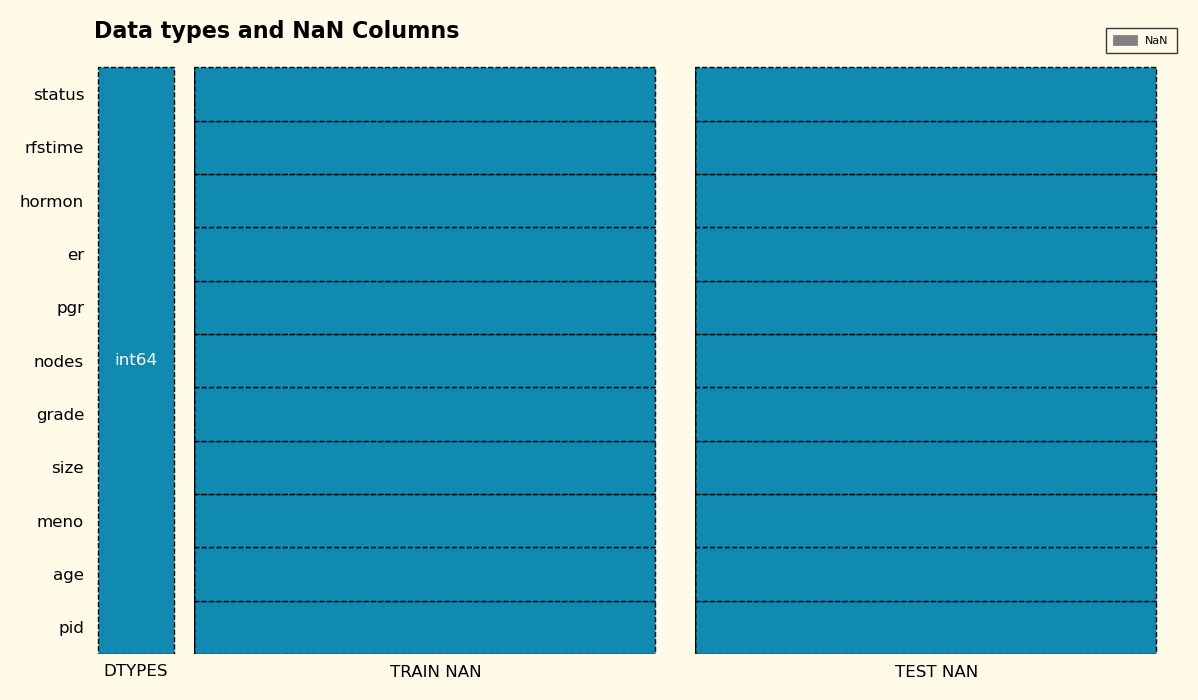

In [34]:
eda.display_nan_count_train_test_chart(save_fig_path='images/nan_count.png')

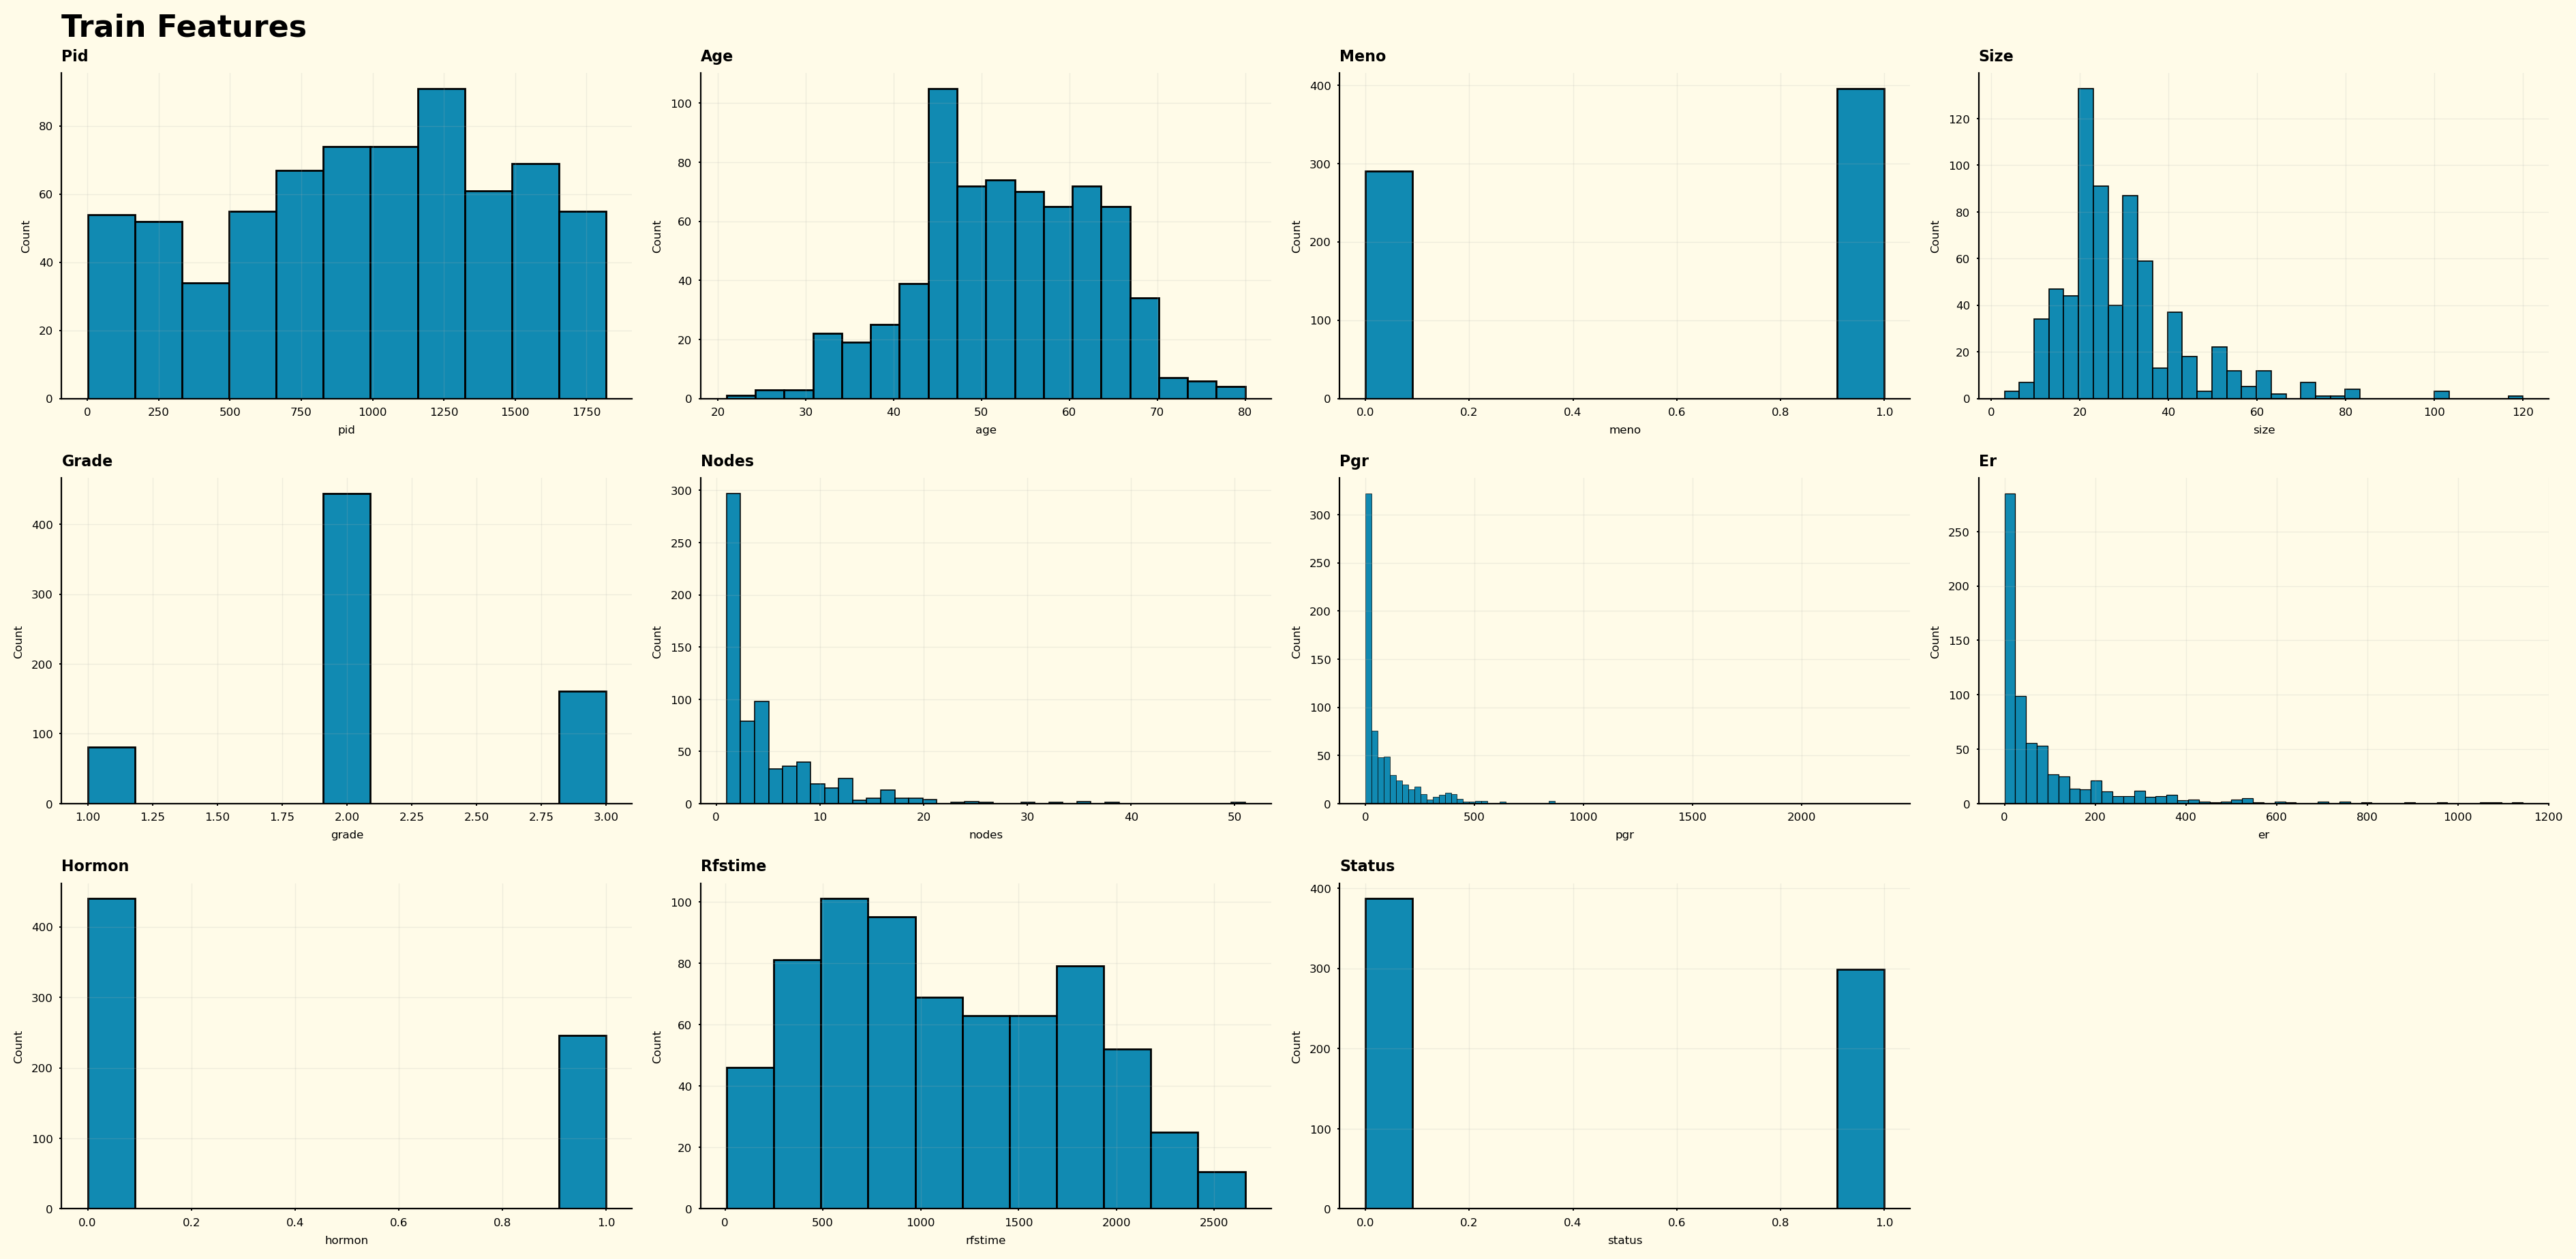

In [35]:
eda.display_all_train_cols(save_fig_path='images/all_features.png')

In [29]:
features = ['age', 'meno', 'size', 'grade', 'nodes', 'pgr', 'er', 'hormon','rfstime']
axs= get_list_of_axes(3,4)

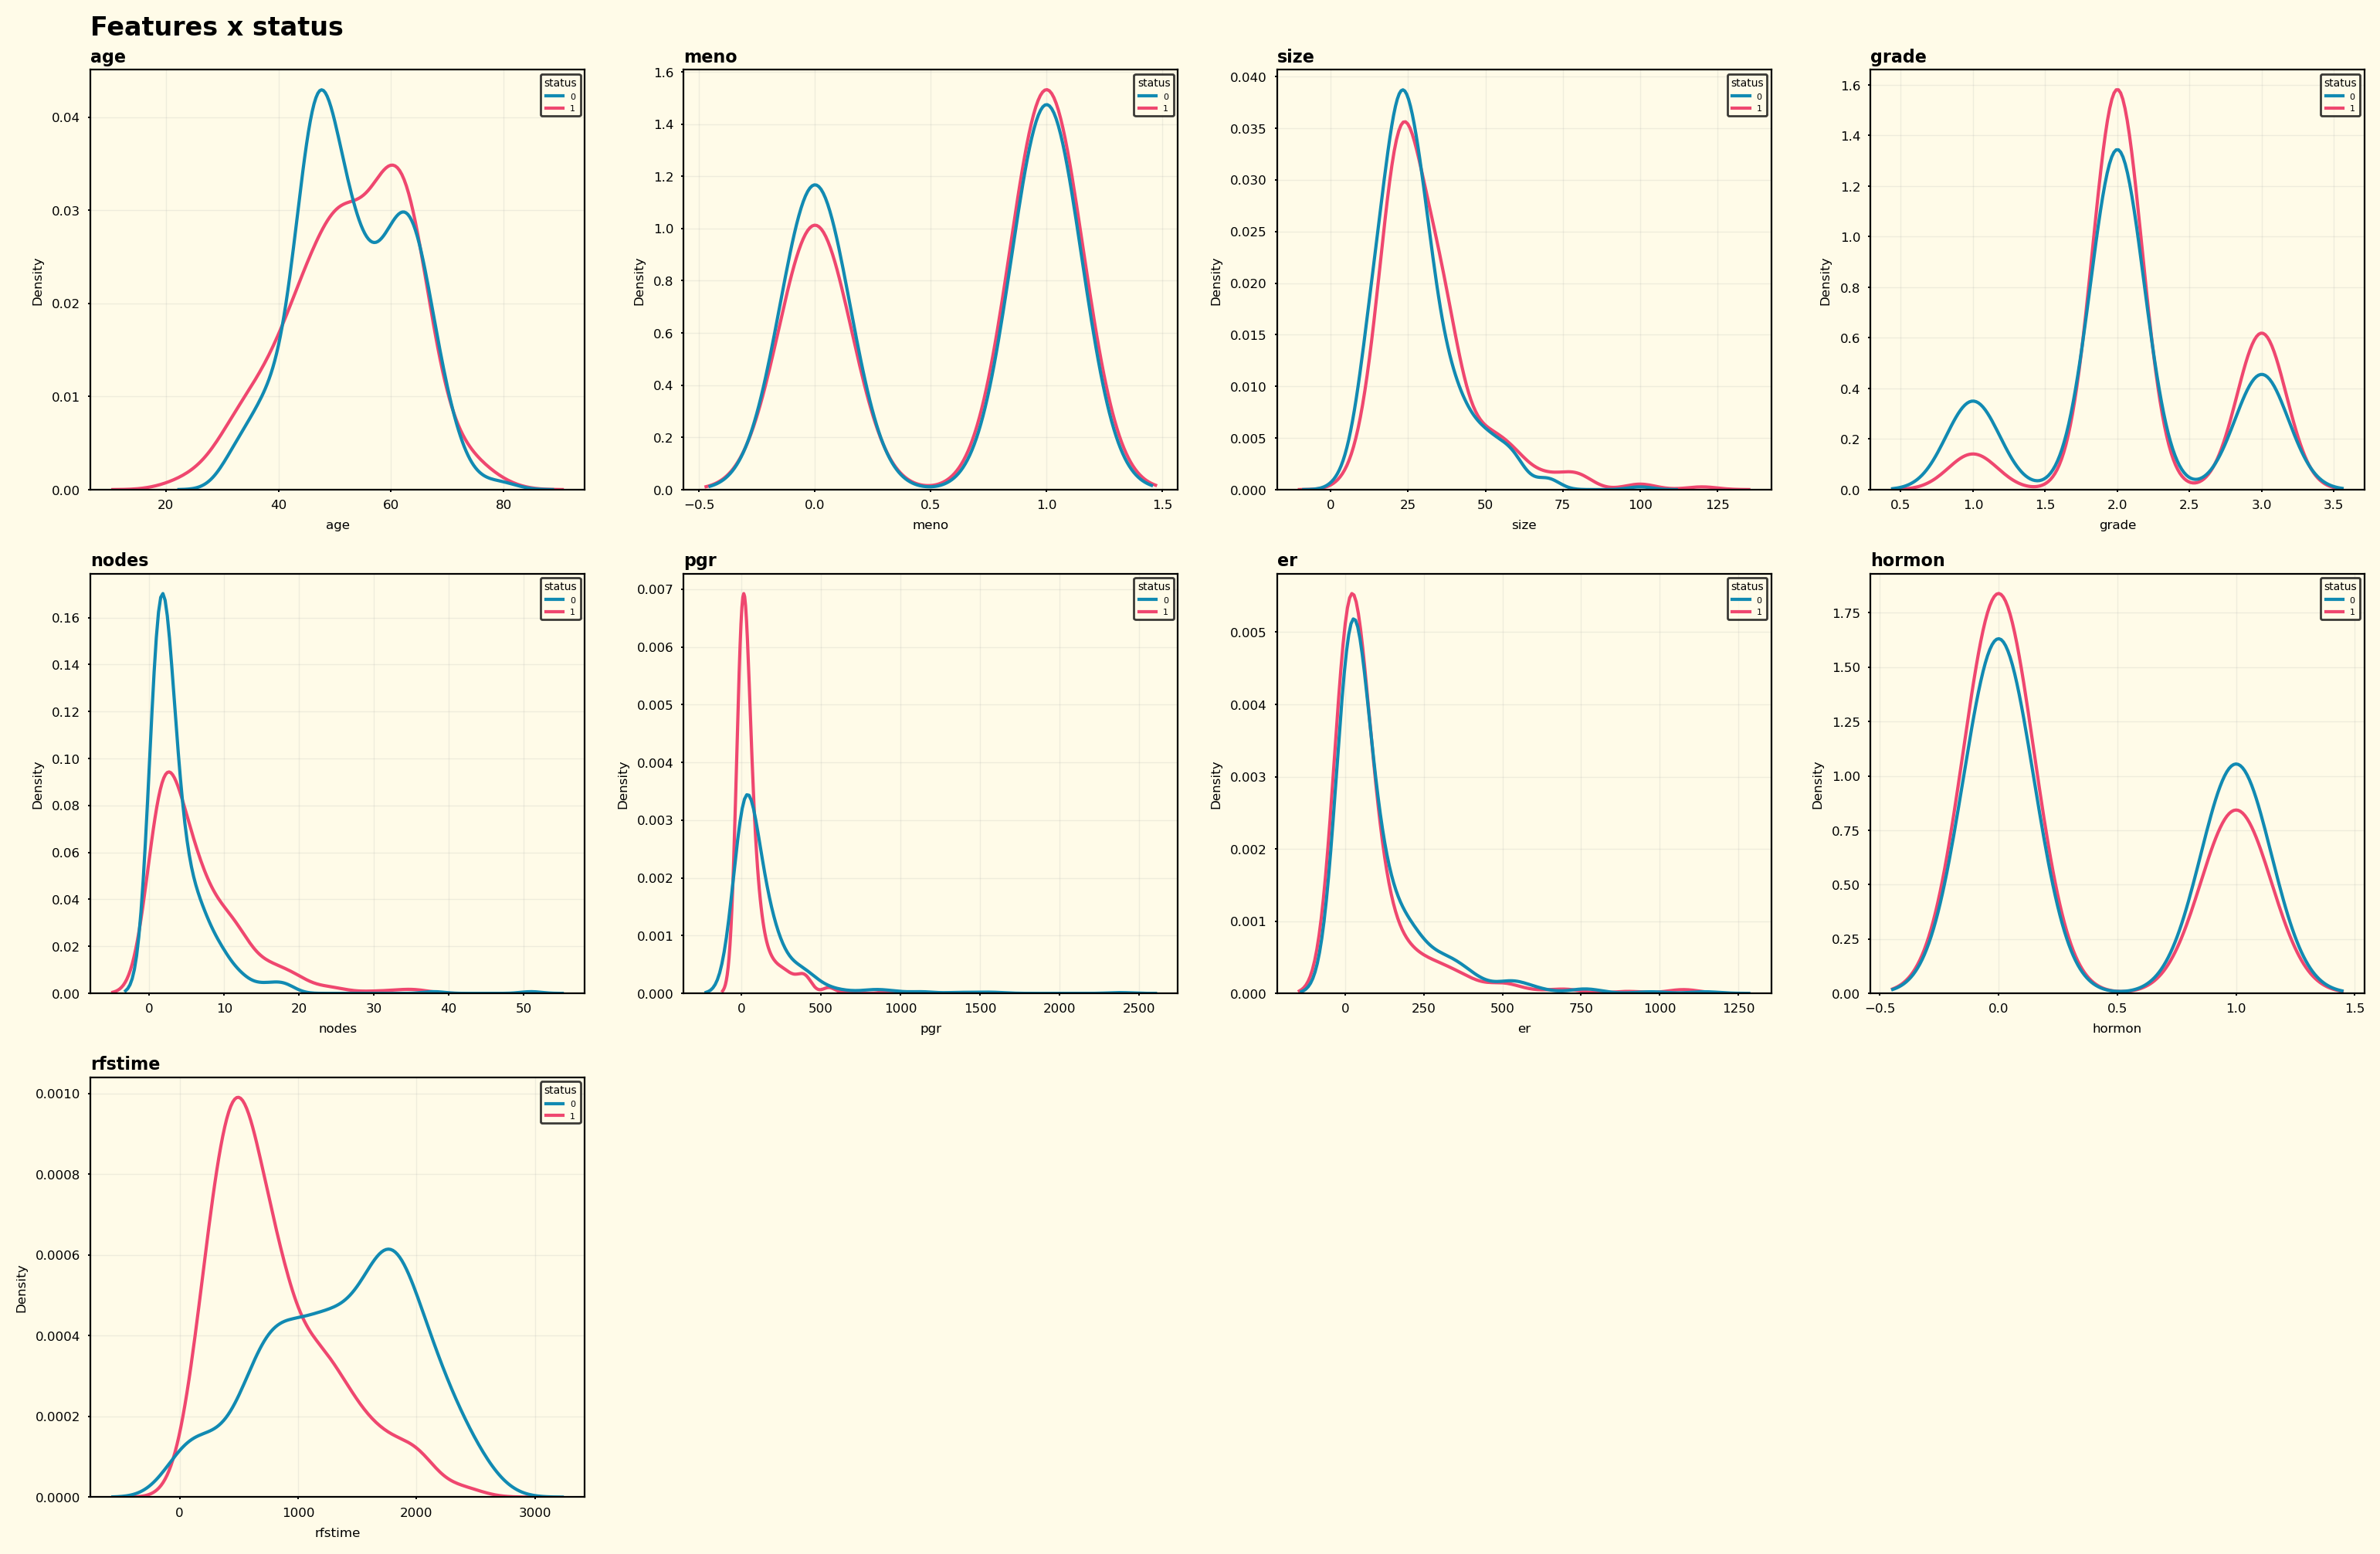

In [30]:
# Compare some features x target
# Some features looks like could have high impact on the rainfall target variable
# humidity, sunshine, cloud, dewpoint
with rc_context(MPLContext.context):
    fig, gs = get_fig_gs(3,4, figsize=(7 + 3 * 4, 4 * 3), dpi=100)

    for idx, feat in enumerate(features):
        axs[idx // 4][idx % 4] = fig.add_subplot(gs[idx // 4, idx % 4])
        sns.kdeplot(df, x=feat, hue='status', ax=axs[idx // 4][idx % 4], fill=False, common_norm =False, linewidth=1.5)
        set_title_subtitle(axs[idx // 4][idx % 4], title=f"{feat}")

    set_title_subtitle(axs[0][0], title=f"Features x status", title_fontsize=12, title_spacing=45)

plt.savefig("images/features_x_status.png")
plt.show()

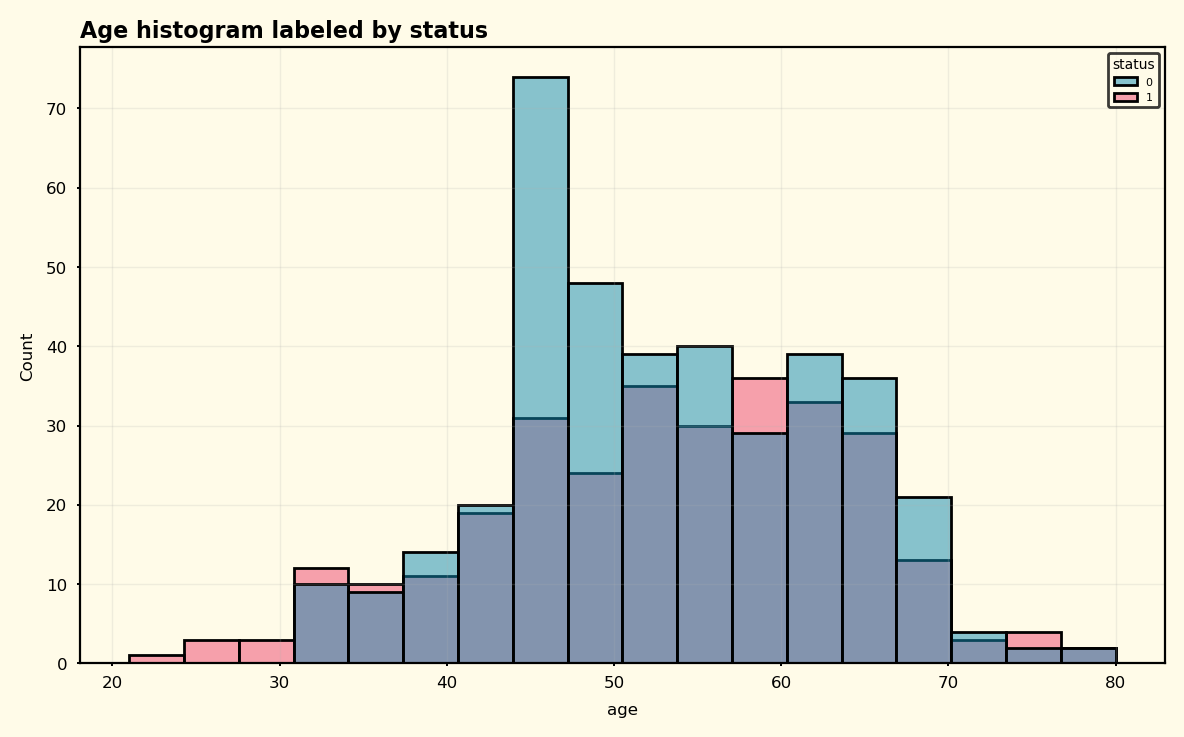

In [27]:
with rc_context(MPLContext.context):
    fig, gs = get_fig_gs(dpi=100)
    ax = fig.add_subplot(gs[0,0])
    sns.histplot(df,x='age',ax=ax, hue='status')
    
    set_title_subtitle(ax,"Age histogram labeled by status")
    plt.savefig("images/hist_age_x_status.png")
    plt.show()

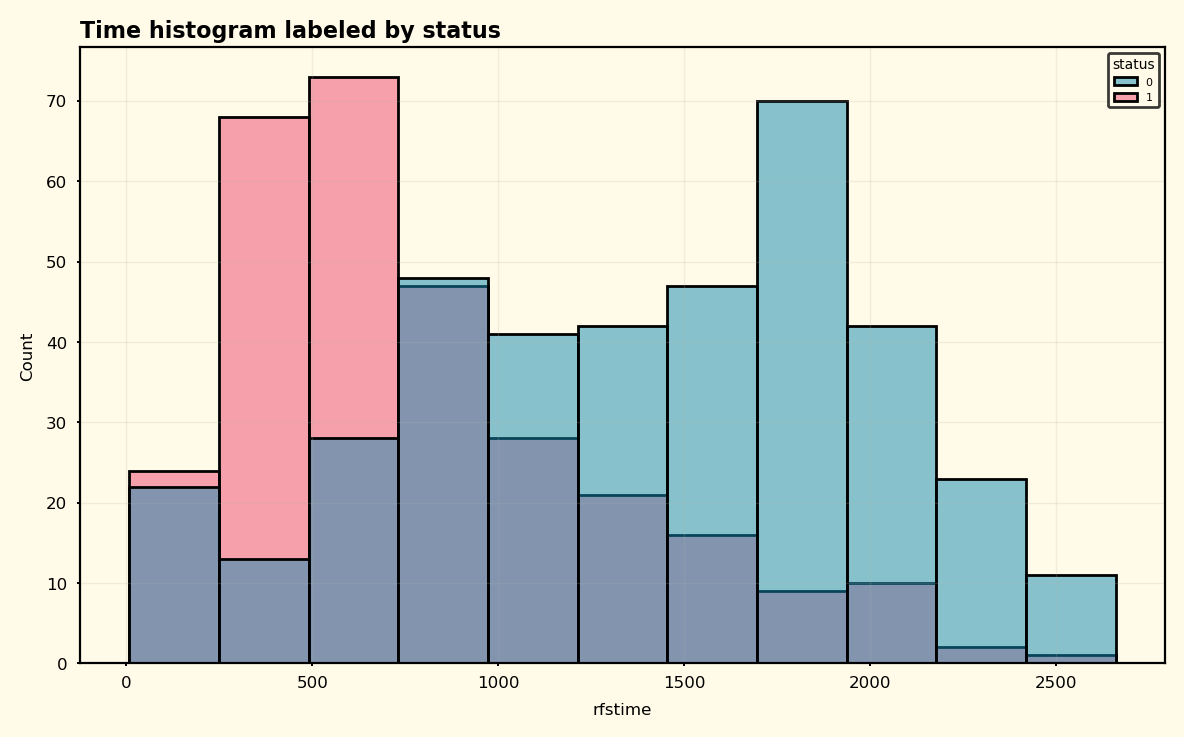

In [28]:
with rc_context(MPLContext.context):
    fig, gs = get_fig_gs(dpi=100)
    ax = fig.add_subplot(gs[0,0])
    sns.histplot(df,x='rfstime',ax=ax, hue='status')
    set_title_subtitle(ax,"Time histogram labeled by status")
    plt.savefig("images/hist_time_x_status.png")
    plt.show()